<a href="https://colab.research.google.com/github/Fondzenyuy/SURP-Astro/blob/main/Wavelet_Analysis_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!conda --version

conda 4.9.2


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


That’s it ! You can now use conda on Google Colab as you wish!

In [ ]:
!conda --version

conda 4.9.2


 Be careful though, every time you quit or reset the runtime environment you will have to install conda again.

That’s why I advise you to always have this piece of code at hand : 


`!conda --version`

`#If !conda --version returns no results, install conda with :`

`#!pip install -q condacolab`

`#import condacolab`

`#condacolab.install() `


In [ ]:
!conda --version

conda 4.9.2


In [ ]:
!pip install --user healpy

In [ ]:
import healpy

In [ ]:
#works



# Wavelets 30 GHz Channel

In [ ]:
!wget -O ffp10_newdust_total_030_full_map.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_newdust_total_030_full_map.fits"

--2021-07-07 03:58:07--  http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_newdust_total_030_full_map.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘ffp10_newdust_total_030_full_map.fits’

ffp10_newdust_total     [    <=>             ] 144.01M  19.9MB/s    in 8.8s    

2021-07-07 03:58:16 (16.5 MB/s) - ‘ffp10_newdust_total_030_full_map.fits’ saved [151009920]



In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import numpy as np
import healpy as hp

In [ ]:
map030 = hp.read_map("ffp10_newdust_total_030_full_map.fits") #reading map

In [ ]:
map030

array([-2.7133717e-04, -9.3698480e-05, -2.5107505e-04, ...,
       -1.5273600e-04, -1.1094811e-04, -7.7221979e-05], dtype=float32)

In [ ]:
#Visualising Map

0.0 180.0 -180.0 180.0


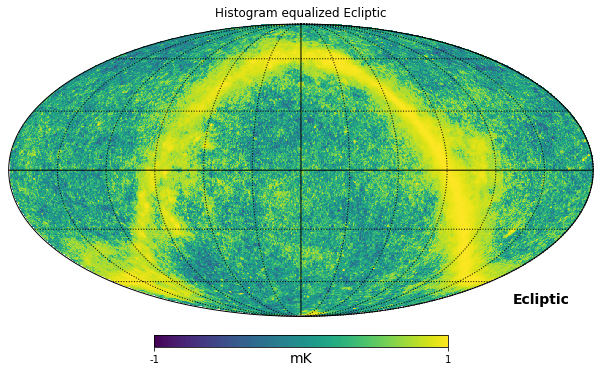

In [ ]:
hp.mollview(
    map030,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

Importing Pys2let (for wavelet processing)

In [ ]:
!pip install pys2let

     |████████████████████████████████| 53 kB 1.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pys2let: filename=pys2let-2.2.3-cp37-cp37m-linux_x86_64.whl size=785843 sha256=407f758b2a4e492a8a2a7d555d9e64bec72f1017426e609242fccfa5f0451e0f
  Stored in directory: /root/.cache/pip/wheels/66/e3/74/9315e2ed56a719edaa32c8aee7f88ee096aa0fdb52e35218b5
Successfully built pys2let


In [ ]:
import healpy as hp
from pys2let import *
import math
import matplotlib.pyplot as plt
import os

In [ ]:
nside = 128
L = 128
J_min = 1
B = 3
J = pys2let_j_max(B, L, J_min)


In [ ]:
J

5

In [ ]:
# compute alms of read map (mao030).
# alm has size L*(L+1)/2

alm = hp.map2alm(map030, lmax=L - 1)  # Its alms
alm


array([ 1.16211762e-03+0.00000000e+00j, -1.29597678e-05+0.00000000e+00j,
       -1.32805705e-03+0.00000000e+00j, ...,
        2.87178242e-05+3.47306679e-05j, -1.25339987e-05+3.72485958e-05j,
       -9.49385333e-06-2.32096577e-06j])

In [ ]:
newmap030 = hp.alm2map(alm, nside=nside, lmax=L - 1)  # Band limited version
newmap030

array([-0.00037512, -0.00010767, -0.00011821, ..., -0.00028097,
       -0.00025236, -0.00033982])

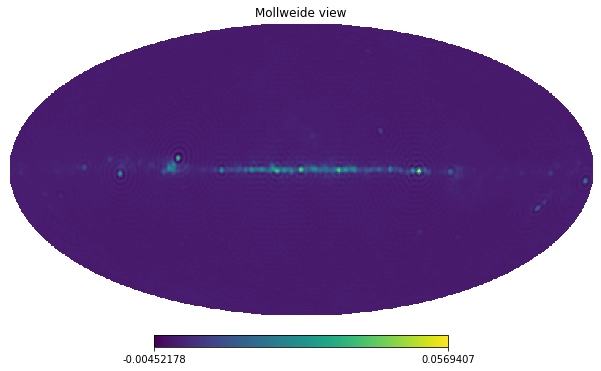

In [ ]:
hp.mollview(newmap030)

In [ ]:
# Call pys2let and compute wavelet transform. Returns the harmonic coefficients of the wavelets.
# map_scal_lm has size L*(L+1)/2
# map_wav_lm has size L*(L+1)/2 by J-J_min+1
map_wav_lm, map_scal_lm = analysis_axisym_lm_wav(alm, B, L, J_min)

In [ ]:
map_wav_lm, map_scal_lm 

(array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j],
        [-1.00447345e-03+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j],
        ...,
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,  2.65511313e-05+3.21103200e-05j,
          1.09430734e-05+1.32342981e-05j],
        [-0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j, -1.15224383e-05+3.42424360e-05j,
         -4.93300495e-06+1.46599271e-05j],
        [-0.00000000e+

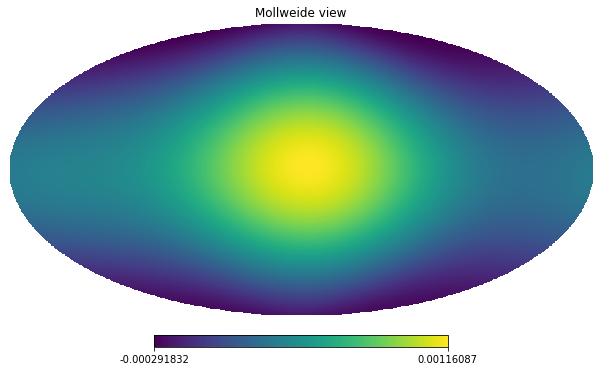

In [ ]:
# Reconstruct healpix maps on the sphere and plot them
map_scal = hp.alm2map(map_scal_lm, nside=nside, lmax=L - 1)
hp.mollview(map_scal)


0
1
2
3
4


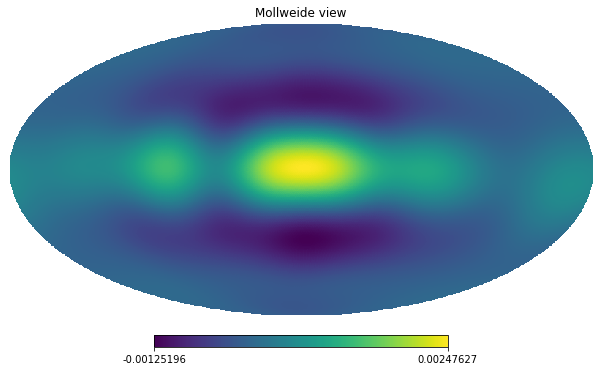

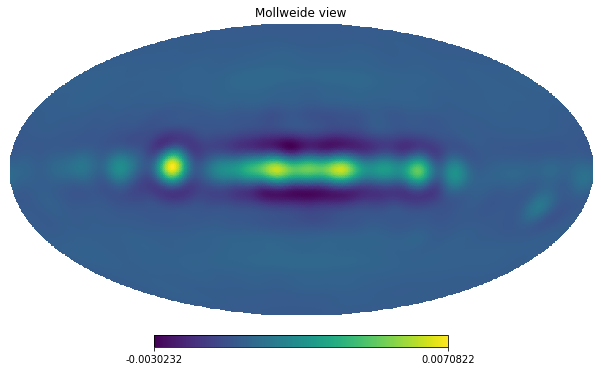

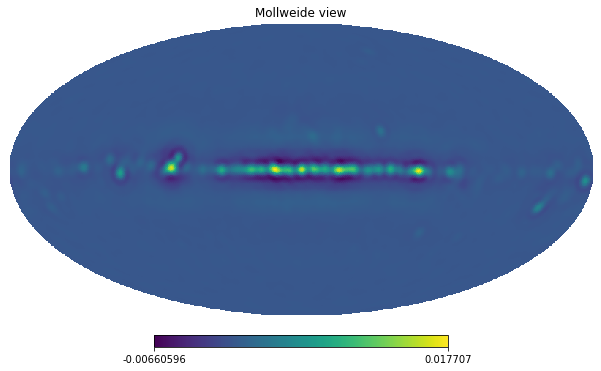

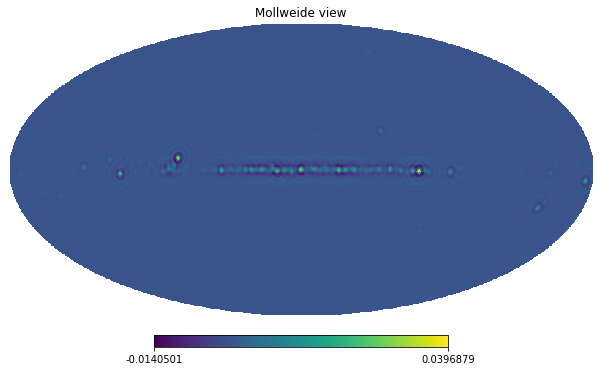

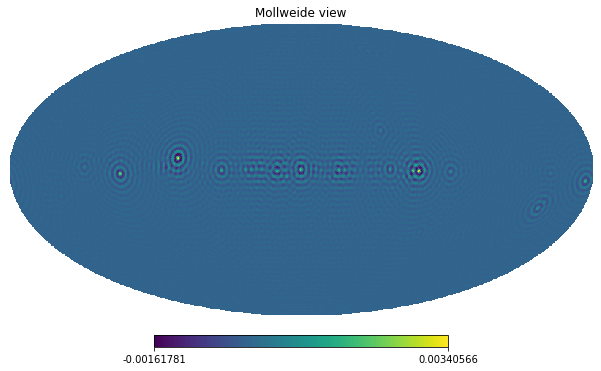

In [ ]:
map_wav = np.empty([12 * nside * nside, J - J_min + 1])
for j in range(J - J_min + 1):
    print(j)
    flm = map_wav_lm[:, j].ravel()
    map_wav[:, j] = hp.alm2map(flm, nside=nside, lmax=L - 1)
    hp.mollview(map_wav[:, j])

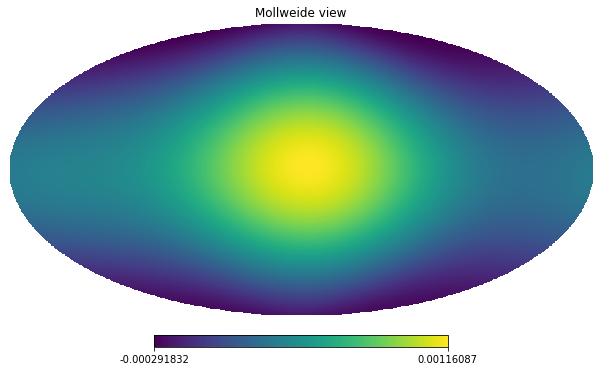

In [ ]:
# Uses synthesis to reconstruct the input map.
map_lm_rec = synthesis_axisym_lm_wav(map_wav_lm, map_scal_lm, B, L, J_min=3)
map_rec = hp.alm2map(map_lm_rec, nside=nside, lmax=L - 1)
hp.mollview(map_rec)

plt.show()

In [ ]:
!conda --version

conda 4.9.2


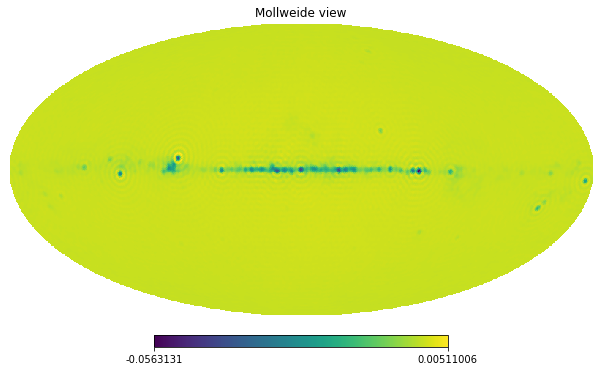

In [ ]:
difference = map_rec - newmap030
hp.mollview(difference)

plt.show()

# Wavelets 857 GHz Channel

In [ ]:
!wget -O ffp10_newdust_total_857_full_map.fits "http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_newdust_total_857_full_map.fits"

--2021-07-07 04:02:05--  http://pla.esac.esa.int/pla/aio/product-action?SIMULATED_MAP.FILE_ID=ffp10_newdust_total_857_full_map.fits
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [image/fits]
Saving to: ‘ffp10_newdust_total_857_full_map.fits’

ffp10_newdust_total     [    <=>             ] 192.01M  20.0MB/s    in 11s     

2021-07-07 04:02:17 (17.3 MB/s) - ‘ffp10_newdust_total_857_full_map.fits’ saved [201335040]



In [ ]:
map857 = hp.read_map("ffp10_newdust_total_857_full_map.fits")

In [ ]:
map857

array([1.1593108, 1.2518576, 1.3053044, ..., 0.9828329, 1.038053 ,
       1.001425 ], dtype=float32)

0.0 180.0 -180.0 180.0


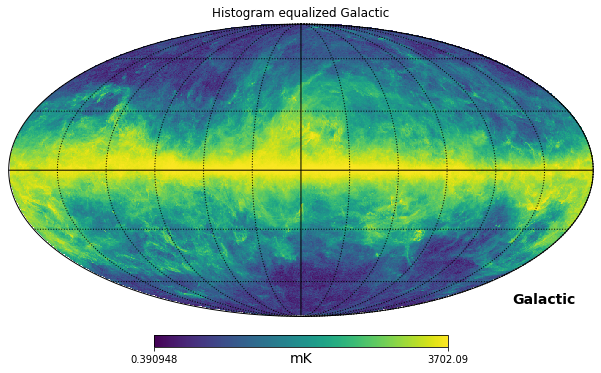

In [ ]:
#visualising
hp.mollview(
    map857,
    coord=["G"],
    title="Histogram equalized Galactic",
    unit="mK",
    norm="hist",
    #min=-1,
    #max=1,
)
hp.graticule()

In [ ]:
# compute alms of read map (map857).
# alm has size L*(L+1)/2

alm857 = hp.map2alm(map857, lmax=L - 1)  # Its alms
alm857

array([ 3.84067142e+01+0.j        , -3.01420711e-01+0.j        ,
       -3.31610416e+01+0.j        , ...,  1.84282890e-01+0.17415584j,
        2.20462336e-02+0.02742668j, -2.92963957e-01-0.12074845j])

In [ ]:
newmap857 = hp.alm2map(alm857, nside=nside, lmax=L - 1)  # Band limited version
newmap857

array([-7.84831924, -0.37390643, -0.32583157, ..., -2.90932229,
       -2.8447824 , -8.49460964])

0.0 180.0 -180.0 180.0


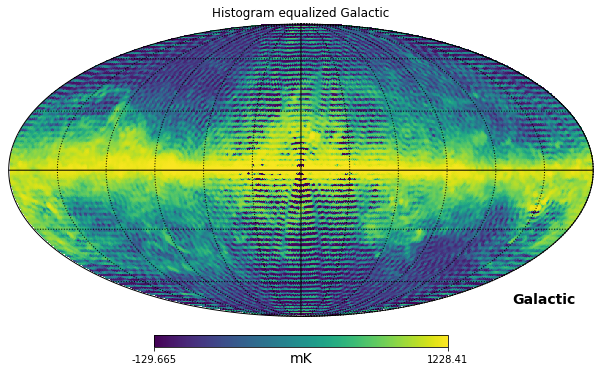

In [ ]:
hp.mollview(
    newmap857,
    coord=["G"],
    title="Histogram equalized Galactic",
    unit="mK",
    norm="hist",
    
)
hp.graticule()

In [ ]:
# Call pys2let and compute wavelet transform. Returns the harmonic coefficients of the wavelets.
# map_scal_lm has size L*(L+1)/2
# map_wav_lm has size L*(L+1)/2 by J-J_min+1
map_wav_lm857, map_scal_lm857 = analysis_axisym_lm_wav(alm857, B, L, J_min)

In [ ]:
map_wav_lm857 , map_scal_lm857

(array([[ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
          0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
          0.00000000e+00+0.j        ],
        [-0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
         -0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
         -0.00000000e+00+0.j        ],
        [-2.50812913e+01+0.j        , -0.00000000e+00+0.j        ,
         -0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
         -0.00000000e+00+0.j        ],
        ...,
        [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
          0.00000000e+00+0.j        ,  1.70379176e-01+0.16101619j,
          7.02219351e-02+0.06636297j],
        [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
          0.00000000e+00+0.j        ,  2.02669853e-02+0.0252132j ,
          8.67673456e-03+0.01079432j],
        [-0.00000000e+00-0.j        , -0.00000000e+00-0.j        ,
         -0.00000000e+00-0.j        , -2.69320207e-01-0

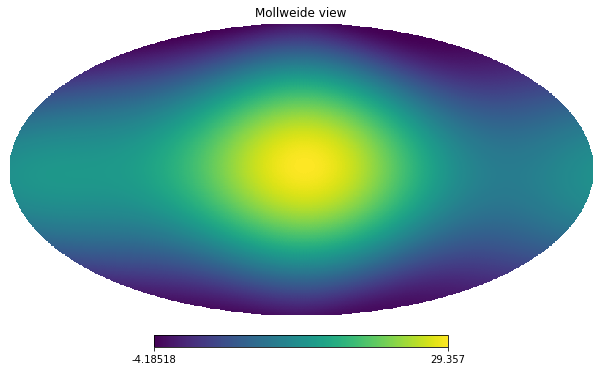

In [ ]:
# Reconstruct healpix maps on the sphere and plot them
map_scal857 = hp.alm2map(map_scal_lm857, nside=nside, lmax=L - 1)
hp.mollview(map_scal857)

0
1
2
3
4


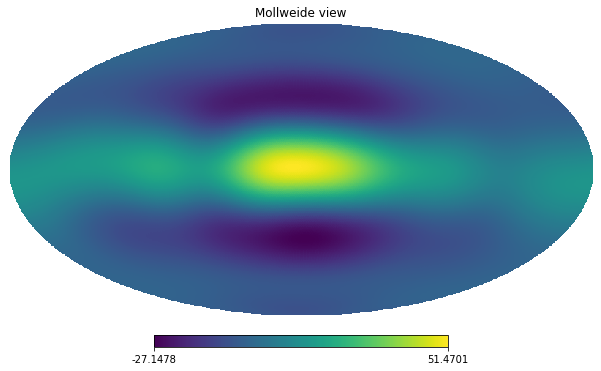

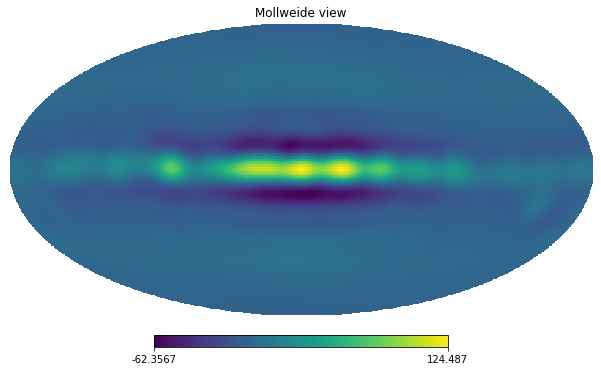

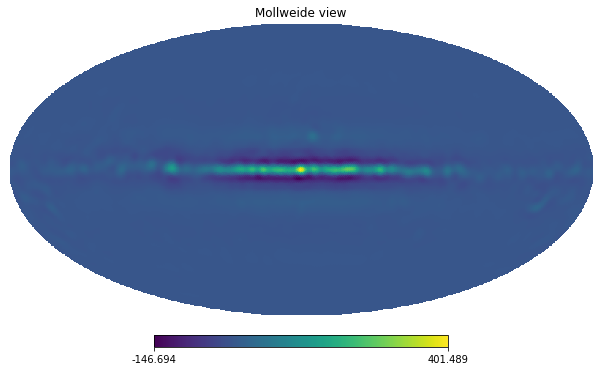

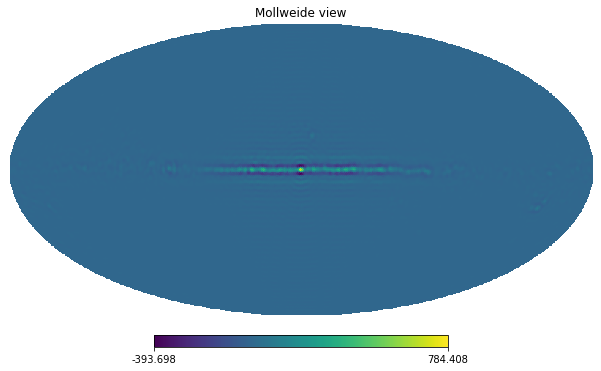

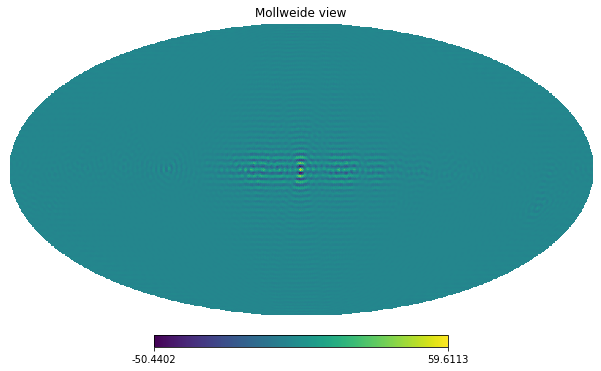

In [ ]:
map_wav857 = np.empty([12 * nside * nside, J - J_min + 1])
for j in range(J - J_min + 1):
    print(j)
    flm857 = map_wav_lm857[:, j].ravel()
    map_wav857[:, j] = hp.alm2map(flm857, nside=nside, lmax=L - 1)
    hp.mollview(map_wav857[:, j])

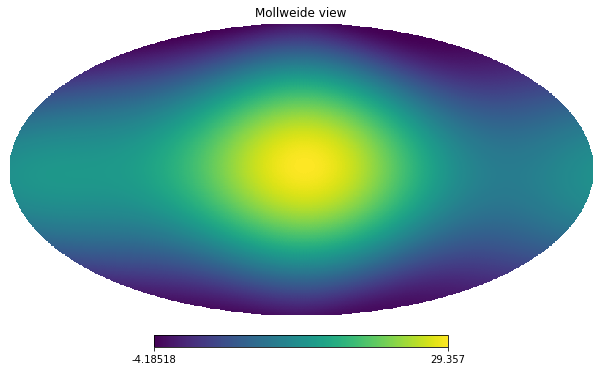

In [ ]:
# Uses synthesis to reconstruct the input map.
map_lm_rec857 = synthesis_axisym_lm_wav(map_wav_lm857, map_scal_lm857, B, L, J_min=3)
map_rec857 = hp.alm2map(map_lm_rec857, nside=nside, lmax=L - 1)
hp.mollview(map_rec857)

plt.show()

In [ ]:
difference2 = map_rec857 - newmap857
difference2

array([ 4.90708975, -2.66138594, -2.72430243, ...,  0.18376646,
        0.11173857,  5.81805139])

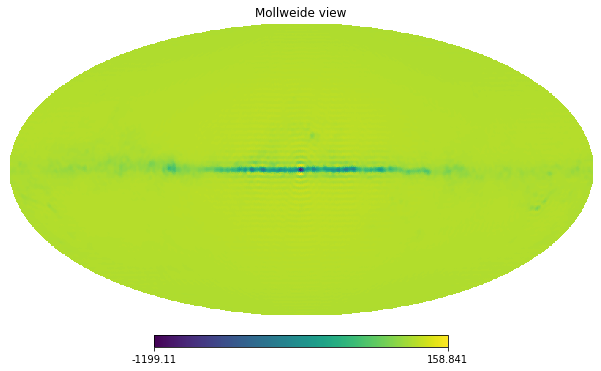

In [ ]:
hp.mollview(difference2)

#plt.show()